# Stock-Market-Analysis-and-Prediction-Exploratory-Data-Analysis-of-Stock-Prices

# By Vivisha Singh

In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import math
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [6]:

data = pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')
dataset_train=data.iloc[0:930,1:2]
dataset_test=data.iloc[930:,1:2]
training_set = data.iloc[0:930, 3:4].values
testing_set=data.iloc[930:,3:4].values

In [7]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [8]:

data.drop('Last', axis=1, inplace=True)
data.drop('Total Trade Quantity', axis=1, inplace=True)
data.drop('Turnover (Lacs)', axis=1, inplace=True)
print(data.head())
data.to_csv('tata_preprocessed.csv',index= False)
data = data.iloc[::-1]

         Date    Open    High     Low   Close
0  2018-10-08  208.00  222.25  206.85  215.15
1  2018-10-05  217.00  218.60  205.90  209.20
2  2018-10-04  223.50  227.80  216.15  218.20
3  2018-10-03  230.00  237.50  225.75  227.60
4  2018-10-01  234.55  234.60  221.05  230.90


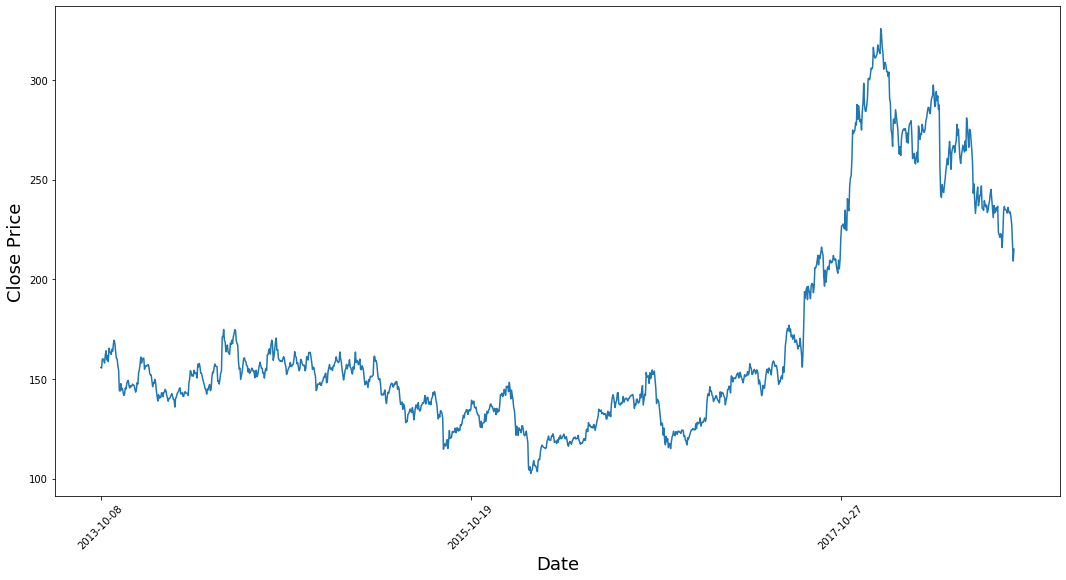

In [9]:

plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(data['Close']))
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
len(training_set_scaled)
X_train = []
y_train = []
for i in range(10,930):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 75))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
15/15 [==============================] - 30s 22ms/step - loss: 0.1040
Epoch 2/200
15/15 [==============================] - 0s 19ms/step - loss: 0.0114
Epoch 3/200
15/15 [==============================] - 0s 19ms/step - loss: 0.0055
Epoch 4/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0042
Epoch 5/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0037
Epoch 6/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0037
Epoch 7/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0033
Epoch 8/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0037
Epoch 9/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0033
Epoch 10/200
15/15 [==============================] - 0s 19ms/step - loss: 0.0031
Epoch 11/200
15/15 [==============================] - 0s 24ms/step - loss: 0.0034
Epoch 12/200
15/15 [==============================] - 1s 39ms/step - loss: 0.0033
Epoch 13/200
15/15 [====

In [12]:
real_stock_price = testing_set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10,305):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

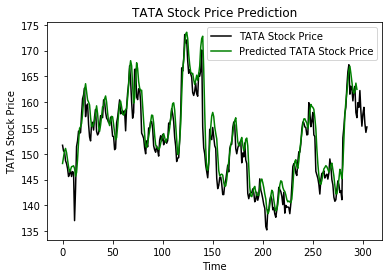

In [13]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

end of code